# Feature engineering for the subproblem ranking task

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
import matplotlib as mpl
import matplotlib.pyplot as plt

# change default font color in matplotlib and seaborn
COLOR = 'black'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR
sns.set_style(style = 'white')
pd.options.display.max_rows = 100

### Load the dataset

In [2]:
# load CSV as DataFrame object
path = "./instances/record_small_sp/subproblem_features.csv"
df = pd.read_csv(path)
df = df.dropna()
print(len(df))

for name, f in zip(df.columns, df.dtypes):
	print(f"'{name}': '{f}',")
df.tail(10)

932190
'# instance days': 'int64',
'# instance surgeons': 'int64',
'# instance patients': 'int64',
'# fully involved patients': 'int64',
'# fully involved patterns': 'int64',
'# fully involved surgeons': 'int64',
'# partially involved patients': 'int64',
'# partially involved patterns': 'int64',
'# partially involved surgeons': 'int64',
'# possible patients': 'int64',
'# possible patterns': 'int64',
'# possible surgeons': 'int64',
'mu': 'float64',
'block load': 'int64',
'block load fractional': 'float64',
'clinical priority average': 'float64',
'clinical priority fractional average': 'float64',
'clinical priority possible average': 'float64',
'waiting days average': 'float64',
'waiting days fractional average': 'float64',
'waiting days possible average': 'float64',
'surgery time average': 'float64',
'surgery time fractional average': 'float64',
'surgery time possible average': 'float64',
'setup time average': 'float64',
'setup time fractional average': 'float64',
'setup time possible a

# instance days  # instance surgeons  # instance patients  \
932180                5                    4                   10   
932181                5                    4                   10   
932182                5                    4                   10   
932183                5                    4                   10   
932184                5                    4                   10   
932185                5                    4                   10   
932186                5                    4                   10   
932187                5                    4                   10   
932188                5                    4                   10   
932189                5                    4                   10   

        # fully involved patients  # fully involved patterns  \
932180                          0                          1   
932181                          2                          1   
932182                          2                          1   
932183                          0                          1   
932184                          1                          1   
932185                          0                          1   
932186                          0                          1   
932187                          2                          1   
932188                          1                          1   
932189                          2                          1   

        # fully involved surgeons  # partially involved patients  \
932180                          0                              0   
932181                          0                              0   
932182                          0                              0   
932183                          0                              0   
932184                          0                              0   
932185                          0                              0   
932186                          0                              0   
932187                          0                              0   
932188                          0                              0   
932189                          0                              0   

        # partially involved patterns  # partially involved surgeons  \
932180                              0                              1   
932181                              0                              1   
932182                              0                              1   
932183                              0                              1   
932184                              0                              1   
932185                              0                              1   
932186                              0                              2   
932187                              0                              2   
932188                              0                              3   
932189                              0                              3   

        # possible patients  ...  setup time fractional histogram 5  \
932180                    0  ...                                  0   
932181                    0  ...                                  0   
932182                    4  ...                                  0   
932183                    0  ...                                  0   
932184                    3  ...                                  0   
932185                    0  ...                                  0   
932186                    0  ...                                  0   
932187                    4  ...                                  0   
932188                    0  ...                                  0   
932189                    3  ...                                  0   

        setup time possible histogram 0  setup time possible histogram 1  \
932180                                0                                0   
932181                                0                            

### Preprocess the dataset

In [54]:
# convert histograms to separate columns
columns_to_convert = [
	'clinical priority histogram',
	'clinical priority fractional histogram',
	'clinical priority possible histogram',
	'waiting days histogram',
	'waiting days fractional histogram',
	'waiting days possible histogram',
	'surgery time histogram',
	'surgery time fractional histogram',
	'surgery time possible histogram',
	'setup time histogram',
	'setup time fractional histogram',
	'setup time possible histogram',
]

for c in columns_to_convert:
	df[c] = df[c].apply(lambda x: [int(el) for el in x[1:-1].split()])
	col_names = [f'{c} {i}' for i in range(len(df[c][0]))]
	df[col_names] = pd.DataFrame(df[c].tolist(), index= df.index)
	df = df.drop([c], axis=1)
df.head()

# instance days  # instance surgeons  # instance patients  \
0               20                    4                  100   
1               20                    4                  100   
2               20                    4                  100   
3               20                    4                  100   
4               20                    4                  100   

   # fully involved patients  # fully involved patterns  \
0                          0                          1   
1                          0                          1   
2                          0                          1   
3                          0                          1   
4                          0                          1   

   # fully involved surgeons  # partially involved patients  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   # partially involved patterns  # partially involved surgeons  \
0                              0                              3   
1                              0                              2   
2                              0                              1   
3                              0                              1   
4                              0                              1   

   # possible patients  ...  setup time fractional histogram 2  \
0                    0  ...                                  0   
1                    0  ...                                  0   
2                    0  ...                                  0   
3                    0  ...                                  0   
4                    0  ...                                  0   

   setup time fractional histogram 3  setup time fractional histogram 4  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   setup time fractional histogram 5  setup time possible histogram 0  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   

   setup time possible histogram 1  setup time possible histogram 2  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   setup time possible histogram 3  setup time possible histogram 4  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   setup time possible histogram 5  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 96 columns]

In [65]:
# prepare features
X = df.copy().drop([
		'SP objective value',
		'batch index',
		'rank'
	], axis=1)
X.head()

# instance days  # instance surgeons  # instance patients  \
0               20                    4                  100   
1               20                    4                  100   
2               20                    4                  100   
3               20                    4                  100   
4               20                    4                  100   

   # fully involved patients  # fully involved patterns  \
0                          0                          1   
1                          0                          1   
2                          0                          1   
3                          0                          1   
4                          0                          1   

   # fully involved surgeons  # partially involved patients  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

   # partially involved patterns  # partially involved surgeons  \
0                              0                              3   
1                              0                              2   
2                              0                              1   
3                              0                              1   
4                              0                              1   

   # possible patients  ...  setup time fractional histogram 2  \
0                    0  ...                                  0   
1                    0  ...                                  0   
2                    0  ...                                  0   
3                    0  ...                                  0   
4                    0  ...                                  0   

   setup time fractional histogram 3  setup time fractional histogram 4  \
0                                  0                                  0   
1                                  0                                  0   
2                                  0                                  0   
3                                  0                                  0   
4                                  0                                  0   

   setup time fractional histogram 5  setup time possible histogram 0  \
0                                  0                                0   
1                                  0                                0   
2                                  0                                0   
3                                  0                                0   
4                                  0                                0   

   setup time possible histogram 1  setup time possible histogram 2  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   setup time possible histogram 3  setup time possible histogram 4  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                0   
4                                0                                0   

   setup time possible histogram 5  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 92 columns]

In [66]:
# prepare labels
y = df.copy().pop('SP objective value')
y.loc[df['SP objective value'] > 0] = 1
y.head()

0   -0.0
1   -0.0
2   -0.0
3   -0.0
4   -0.0
Name: SP objective value, dtype: float64

### Save the dataset

In [55]:
# save the dataset
path = "./instances/features/subproblem_features.csv"
df.to_csv(path, index=False)

## Exploratory analysis

In [43]:
print(df.var())

# instance days                             2.458667e+01
# instance surgeons                         3.924572e+00
# instance patients                         2.484024e+02
# fully involved patients                   1.825404e+00
# fully involved patterns                   2.482027e-01
# fully involved surgeons                   2.355998e+00
# partially involved patients               2.553211e+01
# partially involved patterns               4.487380e+00
# partially involved surgeons               3.497116e+00
# possible patients                         2.692511e+02
# possible patterns                         1.571310e+02
# possible surgeons                         2.840717e-01
mu                                          7.630569e+08
xi                                          0.000000e+00
block load                                  5.981006e+03
block load fractional                       9.386511e+03
clinical priority average                   4.254322e-01
clinical priority fractional av

## Mutual information statistics

### Feature plot

In [68]:
# extract all the discrete features
discrete_features = X.dtypes == np.int64
print(discrete_features)

# instance days                              True
# instance surgeons                          True
# instance patients                          True
# fully involved patients                    True
# fully involved patterns                    True
# fully involved surgeons                    True
# partially involved patients                True
# partially involved patterns                True
# partially involved surgeons                True
# possible patients                          True
# possible patterns                          True
# possible surgeons                          True
mu                                          False
block load                                   True
block load fractional                       False
clinical priority average                   False
clinical priority fractional average        False
clinical priority possible average          False
waiting days average                        False
waiting days fractional average             False


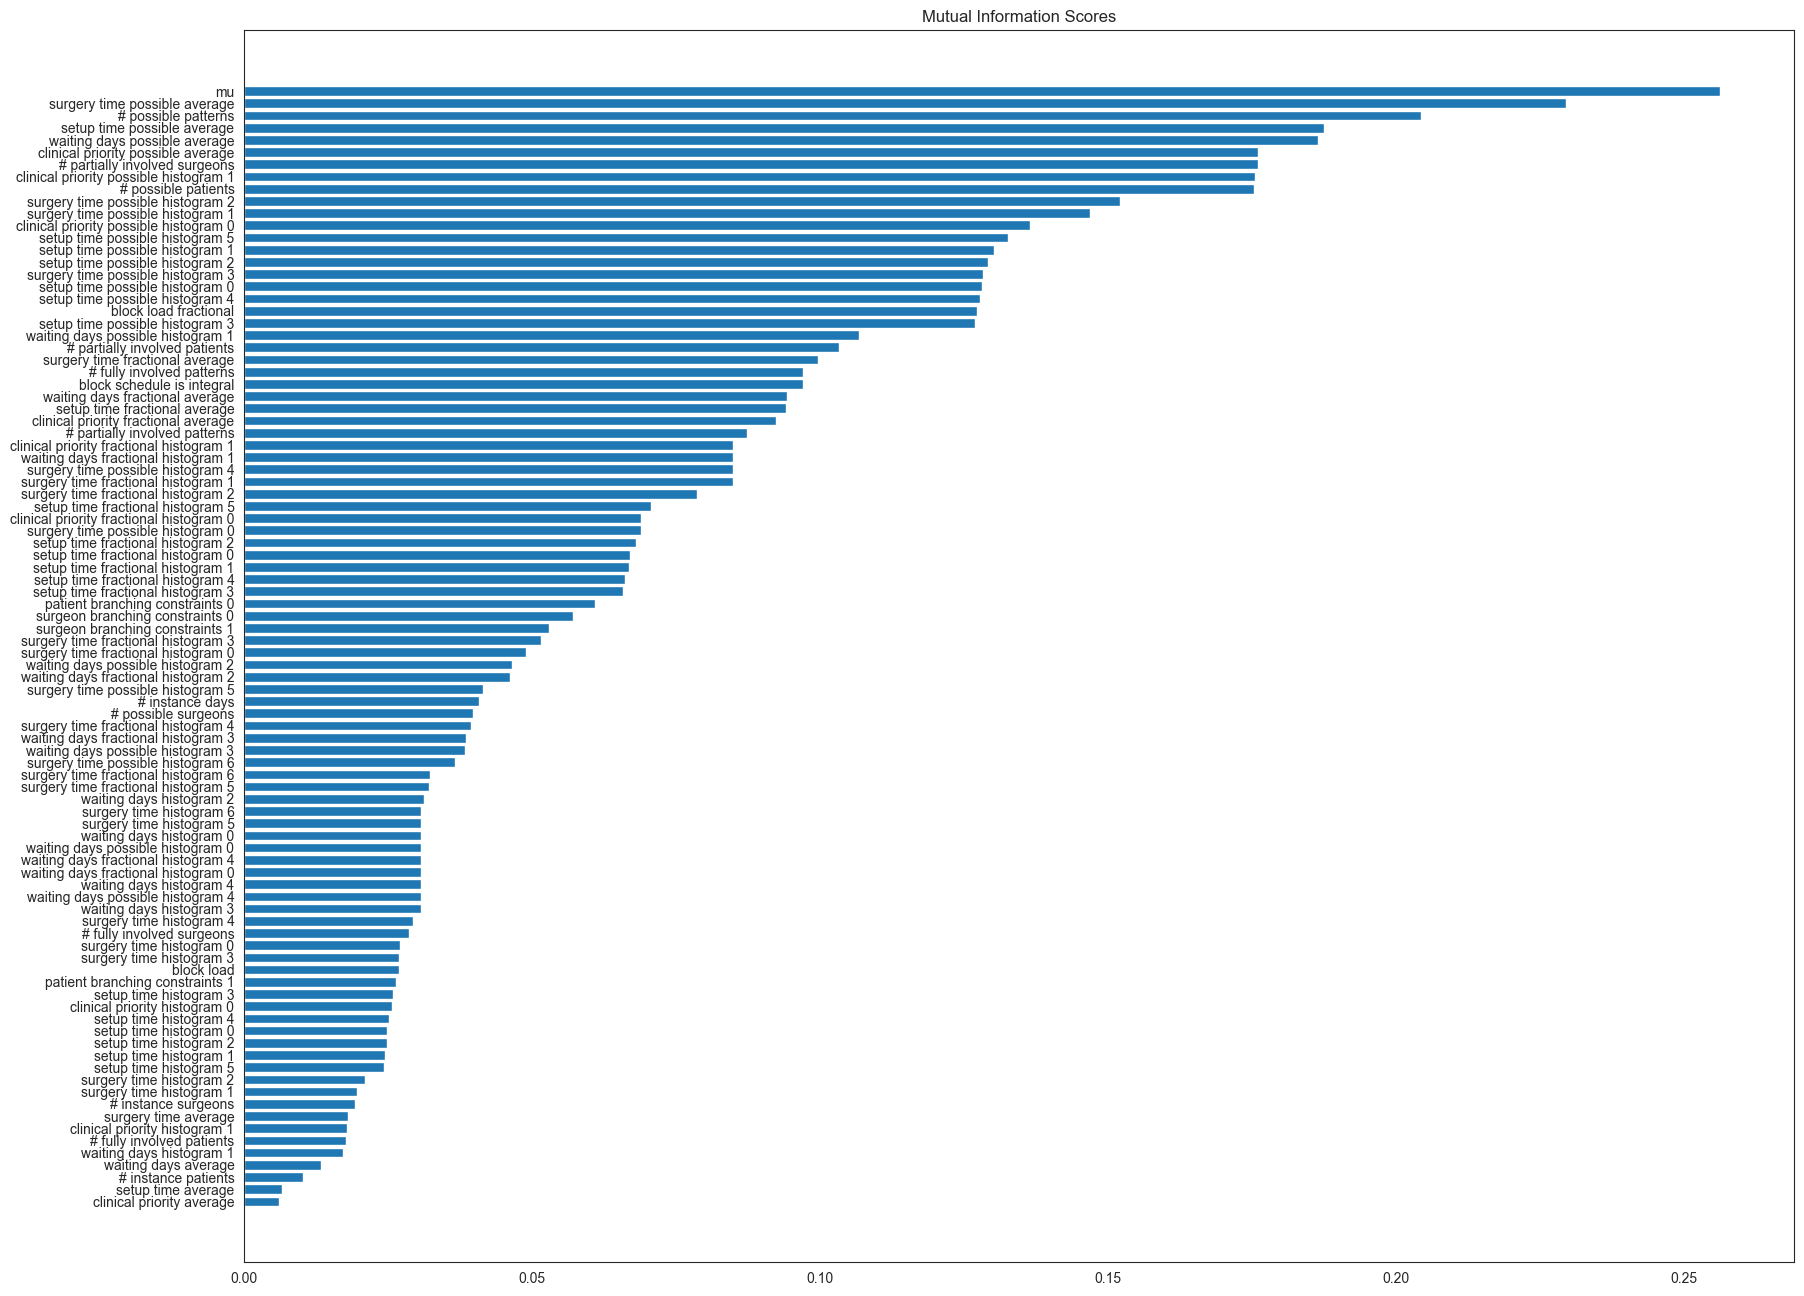

In [70]:
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

mi_scores = make_mi_scores(X, y, discrete_features)
plt.figure(figsize=(20, 16))
plot_mi_scores(mi_scores)

### Feature selection

# instance days: 0.028455237893662222
# instance surgeons: 0.004488341850350963
# instance patients: 0.0
# fully involved patients: 0.0006824753954806084
# fully involved patterns: 0.07676231186028382
# fully involved surgeons: 0.014004971847789704
# partially involved patients: 0.10507136731875377
# partially involved patterns: 0.07937998693129078
# partially involved surgeons: 0.1699691244713213
# possible patients: 0.18270800156641087
# possible patterns: 0.19610013497541612
# possible surgeons: 0.022294002745482544
mu: 0.25632099770738215
xi: 0.0
block load: 0.018604290346941887
block load fractional: 0.12790509912940795
clinical priority average: 0.0027192539373164237
clinical priority fractional average: 0.09381201579112286
clinical priority possible average: 0.18513162991364407
waiting days average: 0.014904371053853005
waiting days fractional average: 0.10046330603887466
waiting days possible average: 0.21274763835743826
surgery time average: 0.024305931350140142
surgery time f

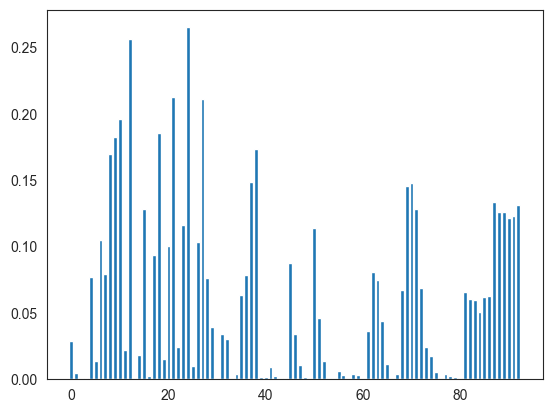

In [79]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')

	# learn relationship from training data
	fs.fit(X_train, y_train)

	# transform train input data
	X_train_fs = fs.transform(X_train)

	# transform test input data
	X_test_fs = fs.transform(X_test)

	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print(f'{X.columns[i]}: {fs.scores_[i]}')

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

## Correlation statistics

### Feature plot

/var/folders/ws/jdkqbxkj3zx_trwplflbz07w0000gn/T/ipykernel_27593/1046406141.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = F.corr()
/var/folders/ws/jdkqbxkj3zx_trwplflbz07w0000gn/T/ipykernel_27593/1046406141.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


<Axes: >

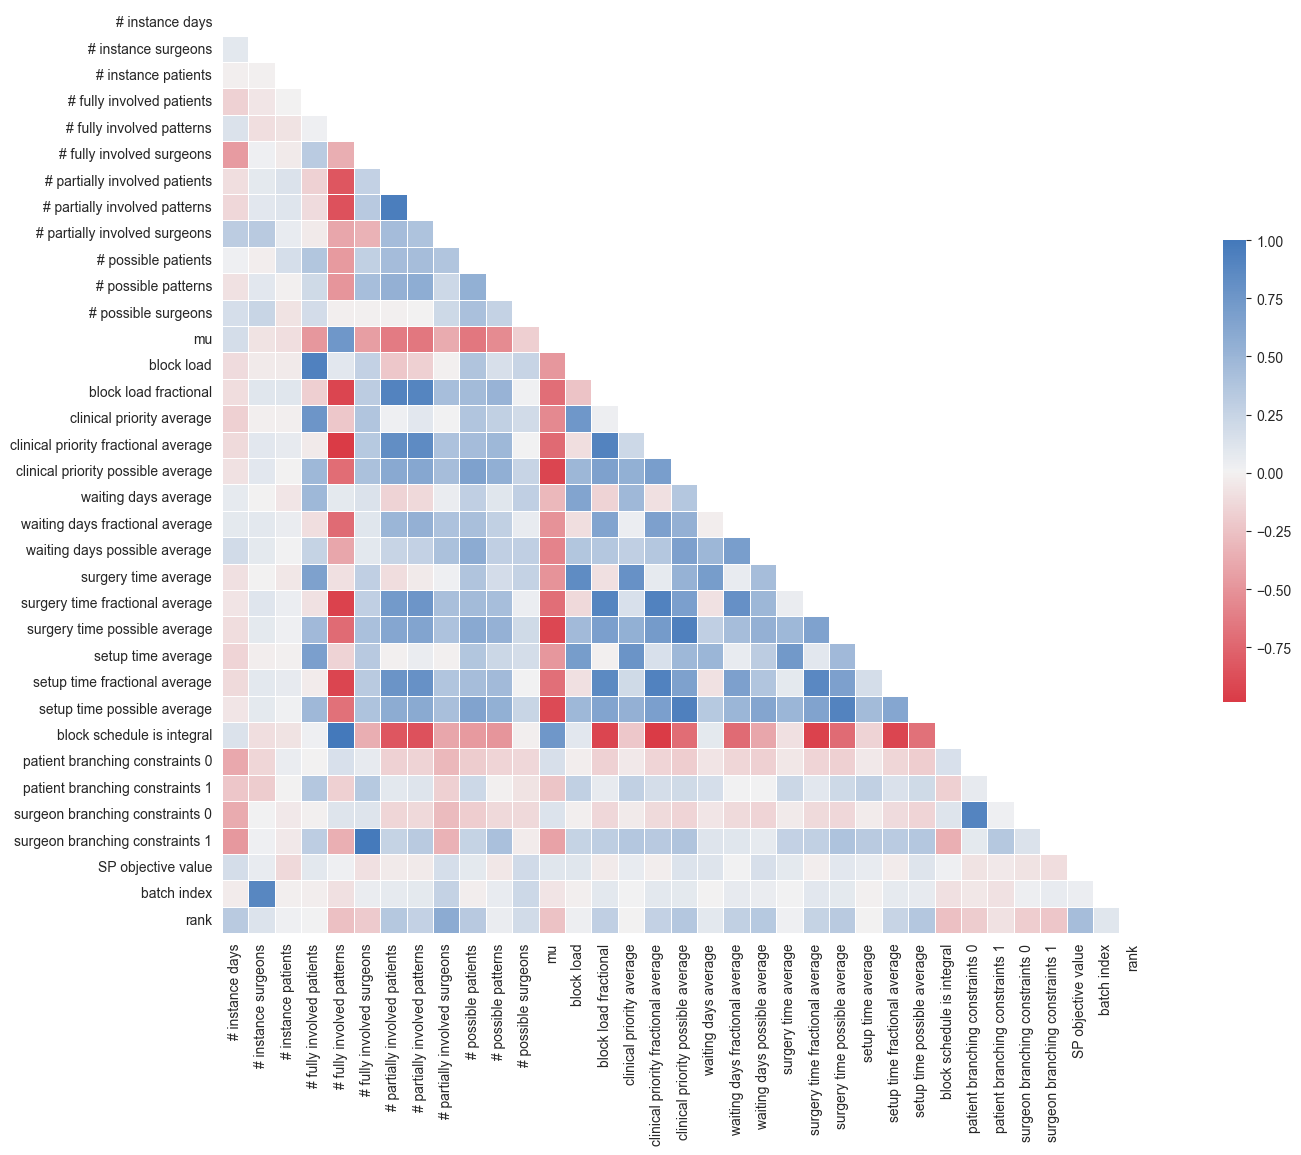

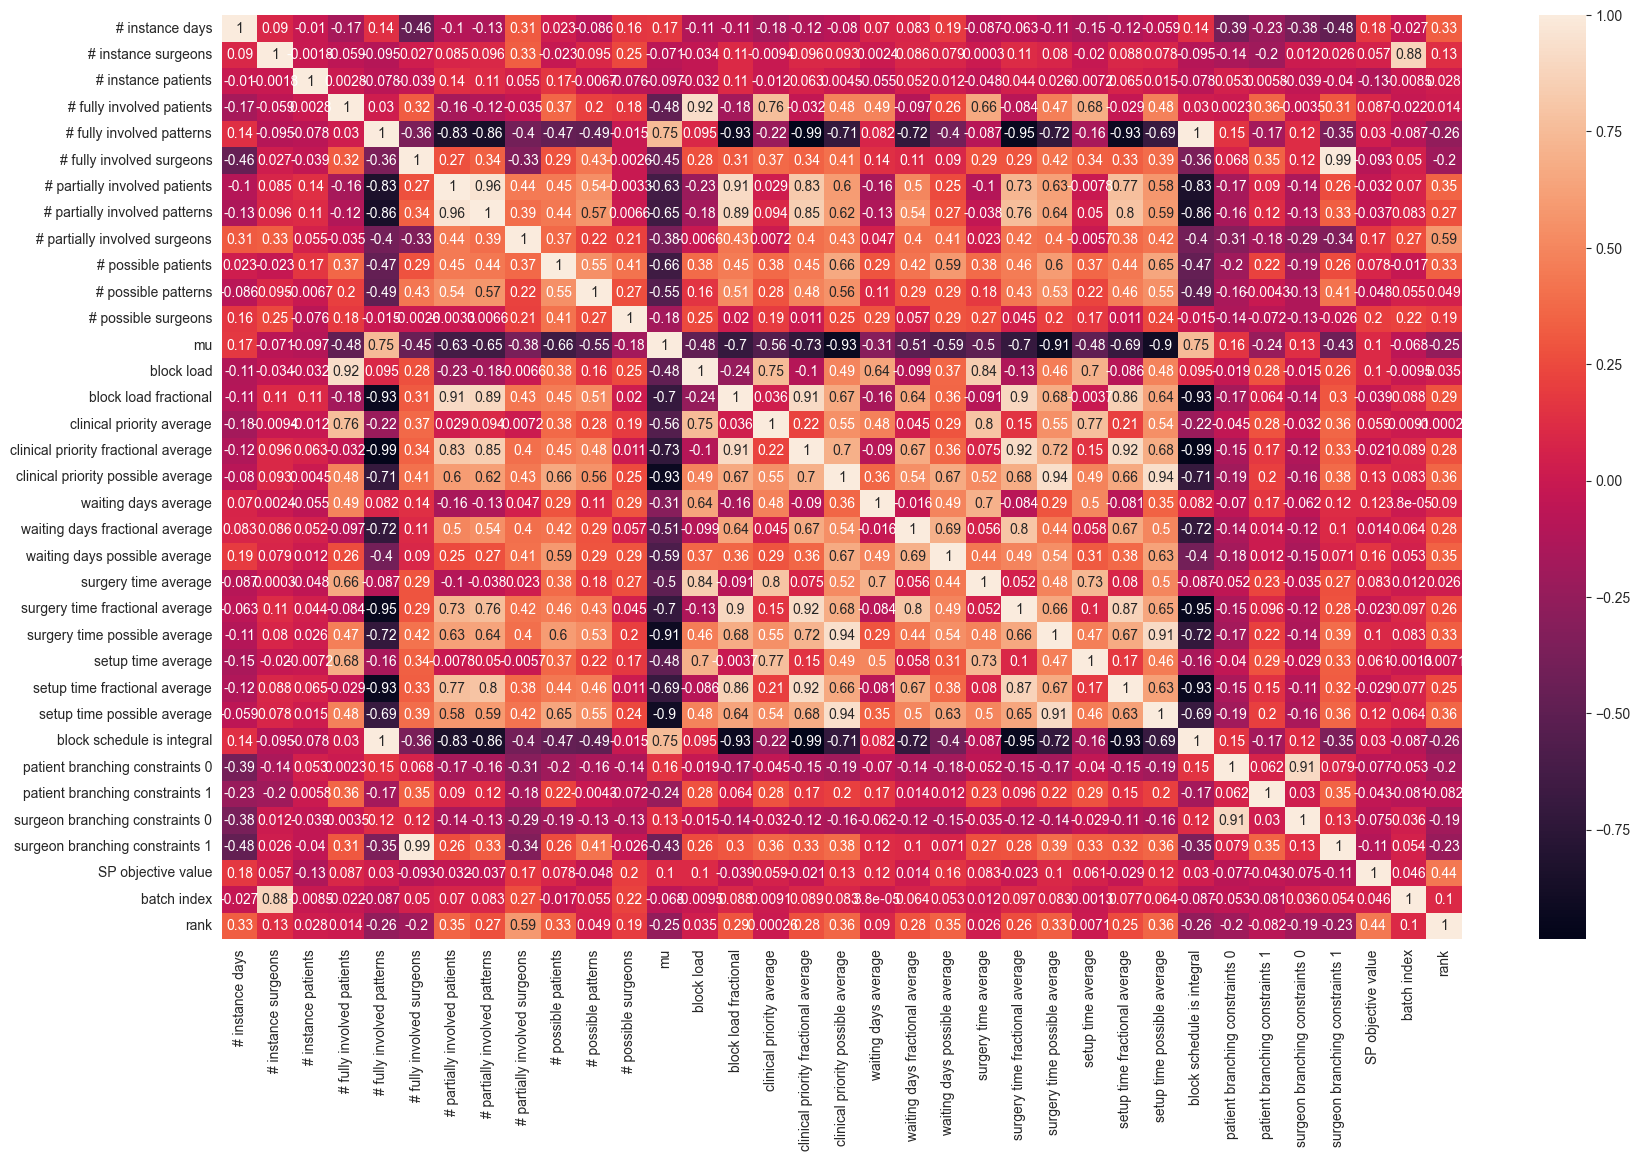

In [32]:
# prepare features that we want to plot the correlation for
F = df.copy()
F = F.drop(['xi'], axis=1)

# use pandas correlation function to compute pairwise correlations for the dataframe
corr = F.corr()

# visualise the data with seaborn
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20,12))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap,
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)

### Feature selection

Feature 0: 1638.561348
Feature 1: 161.321082
Feature 2: 8.832202
Feature 3: 788.501770
Feature 4: 5603.618072
Feature 5: 318.523410
Feature 6: 9257.492516
Feature 7: 6539.661474
Feature 8: 13735.888821
Feature 9: 10115.876213
Feature 10: 1349.154965
Feature 11: 824.640673
Feature 12: 10767.112547
Feature 13: 0.000000
Feature 14: 989.936339
Feature 15: 7002.430857
Feature 16: 531.522644
Feature 17: 5803.556506
Feature 18: 13386.998237
Feature 19: 1439.722449
Feature 20: 3725.858863
Feature 21: 7734.515482
Feature 22: 798.486882
Feature 23: 4849.454558
Feature 24: 9454.731035
Feature 25: 371.539114
Feature 26: 4835.870965
Feature 27: 12173.295244
Feature 28: 5603.618072
Feature 29: 1707.765253
Feature 30: 0.048329
Feature 31: 1534.793024
Feature 32: 647.416542
Feature 33: 520.941296
Feature 34: 486.199518
Feature 35: 5821.705431
Feature 36: 2181.062546
Feature 37: 9274.361244
Feature 38: 9550.434544
Feature 39: 0.000000
Feature 40: 225.348083
Feature 41: 940.350496
Feature 42: 156.684535

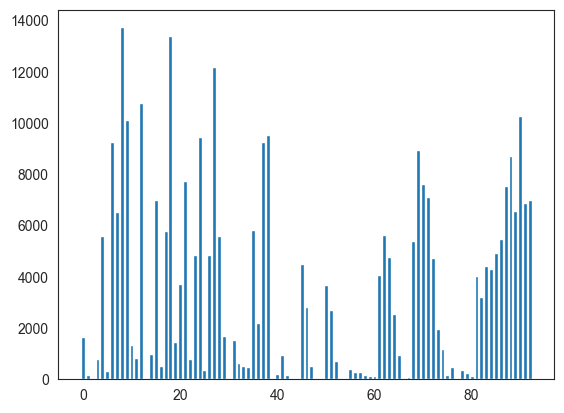

[(0, '# instance days'),
 (1, '# instance surgeons'),
 (2, '# instance patients'),
 (3, '# fully involved patients'),
 (4, '# fully involved patterns'),
 (5, '# fully involved surgeons'),
 (6, '# partially involved patients'),
 (7, '# partially involved patterns'),
 (8, '# partially involved surgeons'),
 (9, '# possible patients'),
 (10, '# possible patterns'),
 (11, '# possible surgeons'),
 (12, 'mu'),
 (13, 'xi'),
 (14, 'block load'),
 (15, 'block load fractional'),
 (16, 'clinical priority average'),
 (17, 'clinical priority fractional average'),
 (18, 'clinical priority possible average'),
 (19, 'waiting days average'),
 (20, 'waiting days fractional average'),
 (21, 'waiting days possible average'),
 (22, 'surgery time average'),
 (23, 'surgery time fractional average'),
 (24, 'surgery time possible average'),
 (25, 'setup time average'),
 (26, 'setup time fractional average'),
 (27, 'setup time possible average'),
 (28, 'block schedule is integral'),
 (29, 'patient branching cons

In [58]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')

	# learn relationship from training data
	fs.fit(X_train, y_train)

	# transform train input data
	X_train_fs = fs.transform(X_train)


	# transform test input data
	X_test_fs = fs.transform(X_test)

	return X_train_fs, X_test_fs, fs

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)

# what are scores for the features
for i in range(len(fs.scores_)):
	print(f'{X.columns[i]}: {fs.scores_[i]}')

# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()